In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
phy_dev=tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(phy_dev[0],True)

In [3]:
df=pd.read_csv("framingham_heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot: >

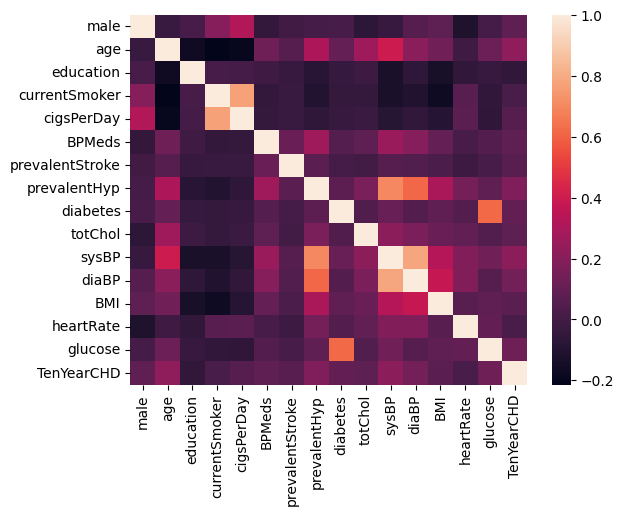

In [4]:
corr=df.corr()
sns.heatmap(corr)

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# df['BPMeds'].fillna(method="ffill",inplace=True)
# df['totChol'].fillna(method="ffill",inplace=True)
# df['BMI'].fillna(method="ffill",inplace=True)
# df['glucose'].fillna(method="ffill",inplace=True)
# df['heartRate'].fillna(method="ffill",inplace=True)

In [8]:
df=df.dropna(axis=0)

In [9]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
X=df.drop(columns=['education', 'currentSmoker', 'cigsPerDay', 'TenYearCHD'])
y=df['TenYearCHD']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
model=Sequential([Dense(16,activation="relu"),
                  Dense(8,activation="relu"),
                  Dense(1,activation="sigmoid")
                  ])

model.compile(loss="binary_crossentropy",optimizer="adam",metrics="accuracy")

In [13]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
92/92 [==============================] - 5s 22ms/step - loss: 1.8145 - accuracy: 0.7404 - val_loss: 0.9207 - val_accuracy: 0.7705
Epoch 2/100
92/92 [==============================] - 1s 12ms/step - loss: 0.9018 - accuracy: 0.7753 - val_loss: 0.6303 - val_accuracy: 0.7869
Epoch 3/100
92/92 [==============================] - 1s 12ms/step - loss: 0.6427 - accuracy: 0.7931 - val_loss: 0.5193 - val_accuracy: 0.8005
Epoch 4/100
92/92 [==============================] - 1s 11ms/step - loss: 0.5612 - accuracy: 0.7979 - val_loss: 0.4697 - val_accuracy: 0.8197
Epoch 5/100
92/92 [==============================] - 1s 13ms/step - loss: 0.5028 - accuracy: 0.8119 - val_loss: 0.4640 - val_accuracy: 0.8169
Epoch 6/100
92/92 [==============================] - 1s 11ms/step - loss: 0.4869 - accuracy: 0.8263 - val_loss: 0.4723 - val_accuracy: 0.8142
Epoch 7/100
92/92 [==============================] - 1s 8ms/step - loss: 0.4992 - accuracy: 0.8232 - val_loss: 0.4268 - val_accuracy: 0.8361
Epoch 8

<AxesSubplot: >

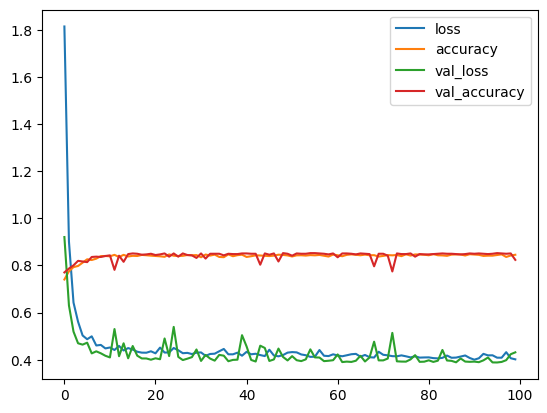

In [14]:
pd.DataFrame(model.history.history).plot()

In [15]:
import numpy as np
x_test_predictions = np.argmax(model.predict(X_test), axis=1)

23/23 [==============================] - 0s 2ms/step


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,x_test_predictions))

[[623   0]
 [109   0]]


In [17]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       109

    accuracy                           0.85       732
   macro avg       0.43      0.50      0.46       732
weighted avg       0.72      0.85      0.78       732



c:\Users\ragav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ragav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ragav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,